# The concept of the Gini coefficient in real estate valuation and market analysis

Cyrill A. Murashev Sovconsult DDO, 2023-10-31

*<div style="text-align: right;">One of the remarkable things about economic inequality is how much it costs the rich.</div>*
<div style="text-align: right;">Joseph Stiglitz (Nobel laureate in Economics)</div>


## Description

The Gini coefficient, often referred to simply as the Gini index or Gini ratio, is a statistical measure used to represent income or wealth inequality within a population. It was developed by the Italian statistician Corrado Gini in 1912.

The Gini coefficient ranges from 0 to 1, where:
1) 0 represents perfect equality, meaning everyone in the population has the same income or wealth;
1) 1 represents perfect inequality, where one person or group has all the income or wealth, and everyone else has none. This is the most extreme case of inequality;
1) A Gini coefficient value of 0.5 means that 50% of the income or wealth is concentrated in the hands of just one person or group, leaving the remaining 50% to be shared by the rest of the population.

In practice, the Gini coefficient is usually expressed as a value between 0 and 100, where 0 represents perfect equality and 100 represents perfect inequality.

The formula for the Gini coefficient involves plotting the Lorenz curve, which is a graphical representation of the distribution of income or wealth. The Lorenz curve is a cumulative distribution function that shows the proportion of total income or wealth earned by the bottom x% of the population.

The Gini coefficient is calculated as the area between the Lorenz curve and the line of perfect equality (the diagonal line), divided by the total area under the line of perfect equality. This can be expressed mathematically as:

$$G = \frac{A}{A + B},$$

where

G is the Gini coefficient.

A is the area between the Lorenz curve and the line of perfect equality.

B is the area under the line of perfect equality.

In other words:

$$
Gini = 1 - \frac{2 * Area\ of\ Lorenz\ curve} {Area\ of\ perfect\ equality}
$$

where Area of Lorenz curve is the area under the Lorenz curve, and Area of perfect equality is the area under the diagonal line of perfect equality. The formula for calculating Area of Lorenz curve is as follows:

$$
Area\ of\ Lorenz\ Curve = \sum_{0}^{x}Lorenz\ curve\ values
$$

where x is the percentage of the population that is below the Lorenz curve value.

The formula for calculating Area of perfect equality is as follows:

$$
Area\ of\ perfect\ equality = \sum_{x}^{1}Lorenz\ curve\ values
$$

where x is the percentage of the population that is above the Lorenz curve value.

The Gini coefficient is widely used in economics, sociology, and other fields to quantify and compare income or wealth inequality between different populations, regions, or time periods. It provides a valuable tool for policymakers and researchers to understand and address issues related to inequality.

In the context of the real estate market, we can say that the value of the Gini coefficient equal to 1 reflects the hypothetical situation that only one region has prices above zero, and real estate in all other regions is worth nothing.

On the other hand, a value of 0 reflects the situation where all regions have the same prices.

From a practical point of view and in connection with the study of the residential real estate market by regions, it is not so much the values of the Gini coefficient itself that are important, but its dynamics. A decrease in the value over time indicates a leveling of the indicators, while an increase indicates an increase in inequality between regions.

## Examples

The following examples illustrate the concept of the Gini coefficient in real estate valuation and market analysis. Let's say we have data on 15 neighborhoods. Our goal is to understand how unequal the capitalization (sum of transaction amounts) for the last year is in these neighborhoods. We will use the generated pseudo data. We will look at the three arrays that reflect the three possible cases. 

First we need to import some libraries. **Numpy** is designed to handle complex computations. **Matplotlib** &mdash; for visualization.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

Then we will define the three functions.
- The **'fibonacci'** function creates an array with the *n* first elements of the Fibonacci sequence.
- The **'gini'** function calculates the Gini ratio for the given array.
- The **'lorenz'** function calculates the parameters of the Lorenz curve.

In [2]:
# Define functions
def fibonacci(n):
    fib_sequence = [0, 1]
    while len(fib_sequence) < n:
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
    return fib_sequence[:n]

def gini(arr):
    count = len(arr)
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = sum(arr)
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    scaled_prefix_sum = np.cumsum(arr) / sum(arr)
    return np.insert(scaled_prefix_sum, 0, 0)


Now we will generate the three arrays with pseudo data about the capitalization in the considered neighborhoods.
* The first one represents the first 15 numbers of the Fibonacci sequence.
* The second &mdash; the  squares of the first. As it is known, the operation of squares increases the difference between positive real numbers greater than one.
* The third &mdash; the square roots of the first. As it is also known, the operation of roots reduces the difference between such numbers.

We also plot the values of each array to show the difference in the spread of the values. It is reasonable to use a logarithmic scale because the values increase dramatically in a quadratic array.

 Values of the initial array: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
 Values of the quadratic array: [0, 1, 1, 4, 9, 25, 64, 169, 441, 1156, 3025, 7921, 20736, 54289, 142129]
 Values of the square-rooted array.: [0.0, 1.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.23606797749979, 2.8284271247461903, 3.605551275463989, 4.58257569495584, 5.830951894845301, 7.416198487095663, 9.433981132056603, 12.0, 15.264337522473747, 19.4164878389476]


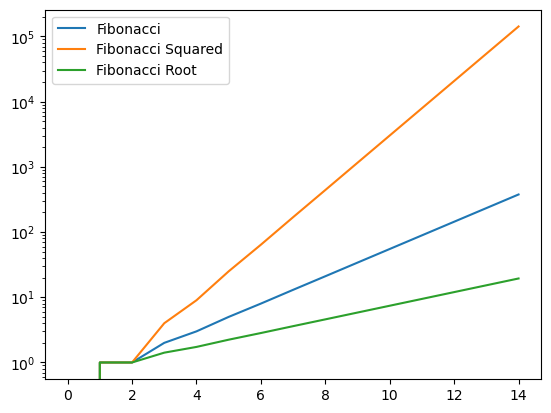

In [3]:
# Generate three arrays
array_1 = fibonacci(15)
array_2 = [x ** 2 for x in array_1]
array_3 = [x ** 0.5 for x in array_1]

# Show the values of the arrays
print(f' Values of the initial array: {array_1}')
print(f' Values of the quadratic array: {array_2}')
print(f' Values of the square-rooted array.: {array_3}')

# Plot the three arrays
plt.plot(array_1, label='Fibonacci')
plt.plot(array_2, label='Fibonacci Squared')
plt.plot(array_3, label='Fibonacci Root')
plt.legend()
plt.yscale('log')
plt.show()


Now we can calculate the Lorenz curve and the Gini coefficient. After that, we visualize the line of perfect equality as a black dashed line. For example, the point on it with coordinates (0.34, 0.34) represents the fact that the 34 percent of the neighborhoods have the 34 percent of the capitalization in the whole area.  The Lorenz curve is shown as a blue line. For example, the point on it with coordinates (0.34, 0.05) represents the fact that the 34 percent of neighborhoods have only 5 percent of the area's capitalization. The total area under the line of perfect equality is 1. The red area between the line of perfect equality and the Lorenz curve represents the actual inequality. Its value is the Gini coefficient.

Let's start with the initial array resulting from the Fibonacci sequence.

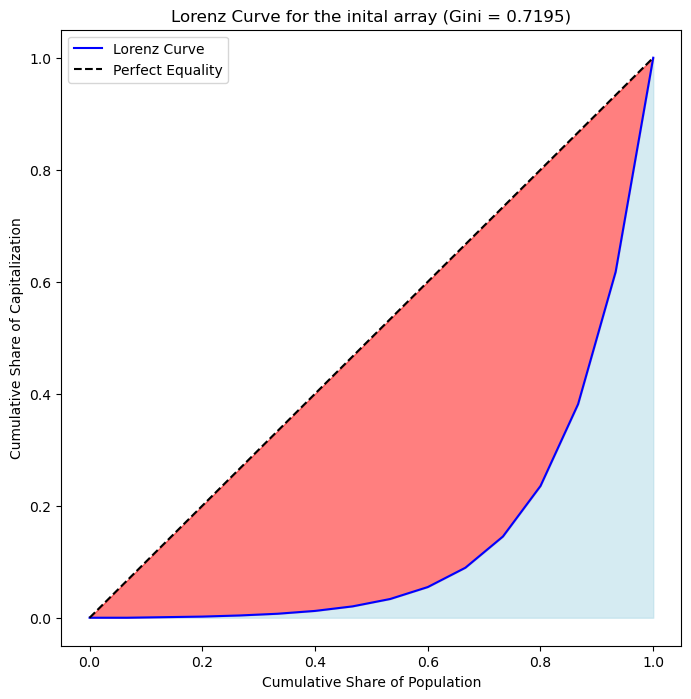

In [4]:
# Calculate Gini and Lorenz curve
gini_index = gini(array_1)
lorenz_curve = lorenz(array_1)

# Plotting (same as before)
plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size),
         lorenz_curve, label='Lorenz Curve', color='blue')
plt.plot([0, 1], [0, 1], label='Perfect Equality',
         linestyle='--', color='black')
plt.fill_between(np.linspace(0.0, 1.0, lorenz_curve.size),
                 lorenz_curve, np.linspace(0.0, 1.0, lorenz_curve.size),
                 color='red', alpha=0.5)
plt.fill_between(np.linspace(0.0, 1.0, lorenz_curve.size),
                 lorenz_curve, color='lightblue', alpha=0.5)
plt.title(f"Lorenz Curve for the inital array (Gini = {gini_index:.4f})")
plt.xlabel("Cumulative Share of Population")
plt.ylabel("Cumulative Share of Capitalization")
plt.legend()
plt.show()


We got the value of the Gini ratio of about 0.72. As we can see, this situation represents the Pareto principle. Approximately the top 20% of neighborhoods account for 80% of the market capitalization, while the remaining bottom 80% of neighborhoods account for only 20% of the market capitalization of the entire district.

Now we move on to the squared array and compute the Gini coefficient for it.

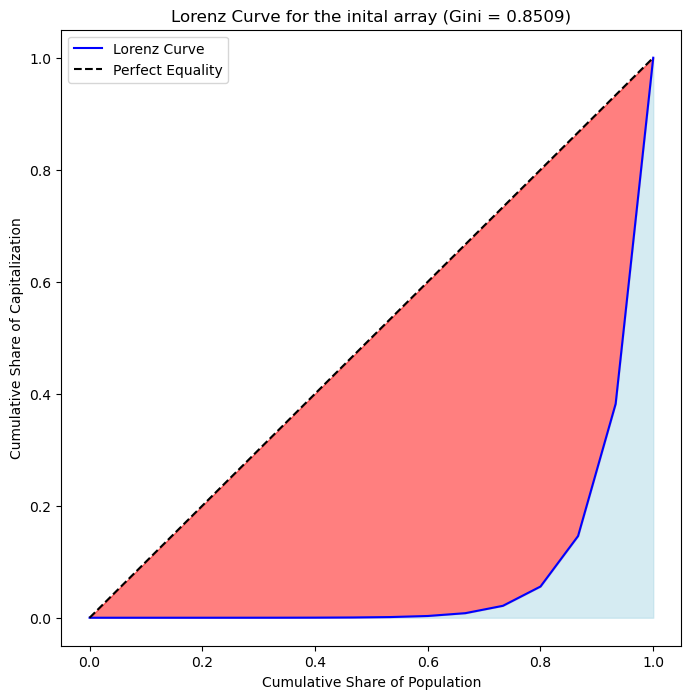

In [5]:
# Calculate Gini and Lorenz curve
gini_index = gini(array_2)
lorenz_curve = lorenz(array_2)

# Plotting (same as before)
plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size),
         lorenz_curve, label='Lorenz Curve', color='blue')
plt.plot([0, 1], [0, 1], label='Perfect Equality',
         linestyle='--', color='black')
plt.fill_between(np.linspace(0.0, 1.0, lorenz_curve.size),
                 lorenz_curve, np.linspace(0.0, 1.0, lorenz_curve.size),
                 color='red', alpha=0.5)
plt.fill_between(np.linspace(0.0, 1.0, lorenz_curve.size),
                 lorenz_curve, color='lightblue', alpha=0.5)
plt.title(f"Lorenz Curve for the inital array (Gini = {gini_index:.4f})")
plt.xlabel("Cumulative Share of Population")
plt.ylabel("Cumulative Share of Capitalization")
plt.legend()
plt.show()


The value of the Gini ratio increased as expected, since the gaps between values in the squared array are much larger than in the original array.

Our final step is to process the square-rooted array. We expect the value of the Gini coefficient to decrease significantly due to the fact that the gaps between the values are much smaller compared to the original array.

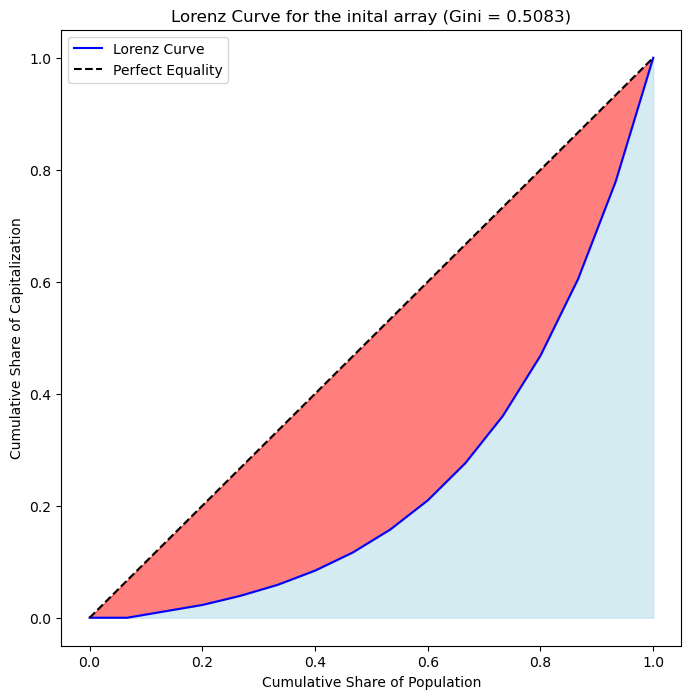

In [6]:
# Calculate Gini and Lorenz curve
gini_index = gini(array_3)
lorenz_curve = lorenz(array_3)

# Plotting (same as before)
plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size),
         lorenz_curve, label='Lorenz Curve', color='blue')
plt.plot([0, 1], [0, 1], label='Perfect Equality',
         linestyle='--', color='black')
plt.fill_between(np.linspace(0.0, 1.0, lorenz_curve.size),
                 lorenz_curve, np.linspace(0.0, 1.0, lorenz_curve.size),
                 color='red', alpha=0.5)
plt.fill_between(np.linspace(0.0, 1.0, lorenz_curve.size),
                 lorenz_curve, color='lightblue', alpha=0.5)
plt.title(f"Lorenz Curve for the inital array (Gini = {gini_index:.4f})")
plt.xlabel("Cumulative Share of Population")
plt.ylabel("Cumulative Share of Capitalization")
plt.legend()
plt.show()


We got the values we expected.

## In lieu of a conclusion

The Gini coefficient, as well as other statistical and machine learning methods, are not yet widely used in real estate valuation and marketing research. Nevertheless, it is fair to say that the Gini coefficient is a powerful tool for understanding market trends. Its value in itself is not meaningful. However, it can be very useful in analyzing the trend of its change over time.

## References

1. [Wikipedia - Gini Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient)
    
1. [Investopedia - Gini Index](https://www.investopedia.com/terms/g/gini-index.asp)
    
1. [World Bank - Gini Index](https://databank.worldbank.org/reports.aspx?source=world-development-indicators#)
    
1. [OECD - Income Distribution Database](https://stats.oecd.org/Index.aspx?DataSetCode=IDD)

1. [Wikipedia - Lorenz Curve](https://en.wikipedia.org/wiki/Lorenz_curve)
 
1. [Khan Academy - Lorenz Curve and Gini Coefficient](https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/a/lorenz-curve-and-gini-coefficient)
  
1. [Penn State University - Introduction to the Lorenz Curve and Gini Coefficient](https://newonlinecourses.science.psu.edu/stat414/node/201/)
  
1. [World Bank - The Lorenz Curve](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html)